<a href="https://colab.research.google.com/github/WilliamSawran/ABC/blob/master/HW3_William_Sawran_3951385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<body>

**<h2>Task 1 Margin, Support Vectors, Non-separable Data, Kernel, Feature Vectors : </h2>**

**<h3>Q1:  What is the margin and support vectors?</h3>**

<p>Given a support vector machine (SVM), the margin is the width that the boundary can be increased by before hitting a data point.  The support vectors are those datapoints that the margin pushes up against.
</p>

**<h3>Q2:  How does SVM deal with non-separable data?</h3>**

<p>SVM deals with non-separable data by mapping the features to a higher dimension until the training data are separable. SVM then fits a decision boundary in the form of a hyperplane in the higher dimension to separate the classes and make predictions.
</p>

**<h3>Q3:  What is a kernel?</h3>**

<p>Because feature mapping is computationally expensive, time-consuming and possibly impractable, the kernel is a function that takes as its input vectors in the original space and returns the dot product of the vectors in the feature space. The kernel eliminates the need for feature mapping.
</p>

**<h3>Q4:  How does a kernel relate to feature vectors?</h3>**

<p>As mentioned, the kernel computes the dot product of two vectors x and y in some (possibly higher dimensional) feature space. Kernels are functions that in a way measure how closely related vectors x and y are. So when x and y are similar, the kernel will output a relatively large value. When x and y are dissimilar, the kernel will be relatively small value. Hence, the kernel serves as a gauge of how similar or dissimilar two vectors are to each other and its computation saves computational time/space because the dot product operation is performed in the original space (without a feature transformation).
</p>


</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h2>Task 2 Constructing a Support Vector Machine : </h2>**

<h2>Construct a support vector machine that computes the kernel function. </h2>

<h2>Use four values of +1 and -1 for both inputs and outputs:</h2>

* [−1, −1] (negative)
* [−1, +1] (positive)
* [+1, −1] (positive)
* [+1, +1] (negative)


<h2>Map the input [$x_{1}$, $x_{2}$] into a space consisting of $x_{1}$ and $x_{1}x_{2}$. </h2>

<table>
<thead>
<tr><th>$x_{1}$</th><th>$x_{1}x_{2}$</th><th>Labels</th></tr>
</thead>
<tbody>
<tr><td>-1</td><td>+1</td><td>negative</td></tr>
<tr><td>-1</td><td>-1</td><td>positive</td></tr>
<tr><td>+1</td><td>-1</td><td>positive</td></tr>
<tr><td>+1</td><td>+1</td><td>negative</td></tr>
</tbody>
</table>

<h2>Draw the four input points in this space, and the maximal margin separator. What is the margin?</h2>
<p>The maximum margin separator is the line $x_{1}x_{2}=0$ with a margin of 1.</p>


</body>
</html>

In [ ]:
#@title Import libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


In [ ]:
#@title Map the input [ x1 ,  x2 ] into a space consisting of  x1  and  x1x2 .

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """

    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


print('The input data map from [x1, x2] to [x1, x1 x2] coordinates as follows:\n')
data = pd.DataFrame({'x1': [-1, -1, 1, 1], 'x2':[-1, 1, -1, 1], 'Labels': ['negative','positive','positive','negative']})
data

arrow = pd.DataFrame({'': [' ', ' ', ' ', ' '],' ': [' ', ' ', '-', ' '], '  ':[' ', ' ', '-', ' '], '   ': [' ',' ','->',' ']}, index = ['', ' ', '  ', '   '])

data_with_mapping = pd.DataFrame({'x1': [-1, -1, 1, 1], 'x2':[-1, 1, -1, 1], 'Labels': ['negative','positive','positive','negative']})
data_with_mapping['x1*x2'] = data["x1"] * data["x2"]


display_side_by_side([data, arrow, data_with_mapping], ['Input Data',' ','Mapped Data\n'])




The input data map from [x1, x2] to [x1, x1 x2] coordinates as follows:



In [ ]:
#@title Import and train svm classifier

#Import svm model
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.datasets import make_blobs

x_train = data_with_mapping[['x1','x2']]
y_train = pd.DataFrame(data_with_mapping['Labels'])
y_train=y_train.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))
print(y_train)
#Create a svm Classifier
svm_classifier = svm.SVC(kernel='linear', C=1000) # Linear Kernel

#Train the model using the training sets
svm_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.


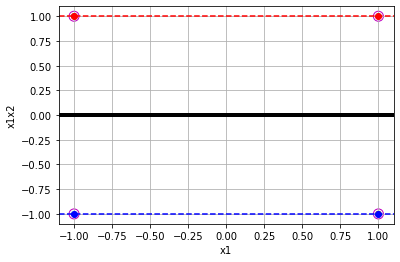

In [ ]:
#@title Plot input points and the maximal margin separator.

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train.values, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='m', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='m')
"""
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
"""
# Label axes
plt.xlabel("x1")
plt.ylabel("x1x2")


plt.plot([-1, 1], [1, 1],  'ro')
plt.plot([-1, 1], [-1, -1], 'bo')
plt.axhline(y=0, color='k', linestyle='-', linewidth=4)
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='b', linestyle='--')
plt.grid(True)
plt.show()



<!DOCTYPE html>
<html>
<body>

<h2>Task 3: Recall that the equation of the circle in the 2-dimensional plane is 
>$(x_{1} − a)^2 + (x_{2} − b)^2 − r^2 = 0$.</h2>

<h2>Please expand out the formula and show that every circular region is linearly separable from the rest
of the plane in the feature space $(x_{1}, x_{2}, x_{1}^2, x_{2}^2)$:</h2>

<h3>Task 3 solution:</h3>

The circle equation expands into five terms, as can be seen below:
>$(x_{1} − a)^2 + (x_{2} − b)^2 − r^2 = 0$

>$x_{1}^2-2ax_{1}+a^2+\left(x_{2}-b\right)^2-r^2=0$

>$x_{1}^2-2ax+a^2+x_{2}^2-2bx_{2}+b^2-r^2=0$

>$x_{1}^2+x_{2}^2-2ax_{1}-2bx_{2}+(a^2+b^2-r^2)=0$

whereby its coefficients and constants corresponding to weights $w = (1, 1, 2a, 2b)$ and intercept $a^2 + b^2 − r^2$.

This shows that a circular boundary is linearly separable from the rest of the plane in this feature space $(x_{1}, x_{2}, x_{1}^2, x_{2}^2)$.
</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h2>Task 4: Recall that the equation of an ellipse in the 2-dimensional plane is $c(x_{1} − a)^2 + d(x_{2} − b)^2 − 1 = 0$. Please show that an SVM using the polynomial kernel of degree 2, $K(u, v) = (1 + u · v)^2$, is equivalent to a linear SVM in the feature space $(1, x_{1}, x_{2}, x_{1}^2, x_{2}^2, x_{1}x_{2})$ and hence that SVMs with this kernel can separate any elliptic region from the rest of the plane.</h2>

<h3>Task 4 solution:</h3>

The ellipse equation expands into six terms, as can be seen below:
>$c(x_{1} − a)^2 + d(x_{2} − b)^2 − r^2 -1 = 0$

>$c(x_{1}^2 − 2ax_{1} + a^2) + d(x_{2}^2 − 2bx_{2} + b^2) − 1 = 0$

>$cx_{1}^2 − 2cax_{1} + ca^2 + dx_{2}^2 − 2dbx_{2} + db^2 − 1 = 0$

>$cx_{1}^2 + dx_{2}^2 − 2cax_{1} − 2dbx_{2} + (ca^2 + db^2 − 1) = 0$

whereby its coefficients and constants corresponding to weights $w = (2ac, 2bd, c, d, 0)$ and intercept $a^2 + b^2 − r^2$.

This shows that SVMs with this kernel can separate any elliptical region from the rest of the plane in this feature space $(1, x_{1}, x_{2}, x_{1}^2, x_{2}^2, x_{1}x_{2})$.
</body>
</html>

<!DOCTYPE html>
<html>
<body>

<h2>Task 5: Consider the following training data</h2>

Class | $x_{1}$ | $x_{2}$
--- | --- | ---
+ | 1 | 1
+ | 2 | 2
+ | 2 | 0
- | 0 | 0
- | 1 | 0
- | 0 | 1

<h3>(a) Plot these six training points. Are the classes {+, −} linearly separable?</h3>

The scatterplot below shows the six training points seem to separate themselves into two clusters of classes, suggesting the classes {+, −} are linearly separable.
</body>
</html>

In [ ]:
#@title Data

task5_data = pd.DataFrame({'x1': [1, 2, 2, 0, 1, 0], 'x2':[1, 2, 0, 0, 0, 1], 'class': ['positive','positive','positive', 'negative','negative','negative']})
task5_data

,x1,x2,class
0,1,1,positive
1,2,2,positive
2,2,0,positive
3,0,0,negative
4,1,0,negative
5,0,1,negative


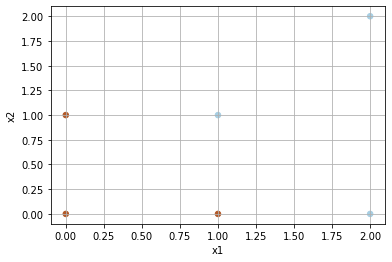

In [ ]:
#@title Plot of six training points.

task5_data['class'] = [0,0,0, 1,1,1]

X_train = task5_data[['x1', 'x2']]
y_train = pd.DataFrame(task5_data['class'])
y_train=y_train.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))
ax = plt.gca()
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.scatter(X_train.x1, X_train.x2, c=task5_data['class'], s=30, cmap=plt.cm.Paired)
plt.show()


<!DOCTYPE html>
<html>
<body>

<h3>(b) Construct the weight vector of the maximum margin hyperplane by inspection and identify the support vectors.</h3>

<p>The maximum margin hyperplane has a slope of $−1$ and has x-intercept $(\frac{3}{2}, 0)$ and y-intercept $(0, \frac{3}{2})$:

>$(y - y_{1}) = m(x − x_{1})$

>$(y - 0) = -1(x − \frac{3}{2})$

>$y = -x + \frac{3}{2}$

>$x + y = \frac{3}{2}$

whereby its weight vector $w = (1, 1)^T$.

Support vectors are the input vectors that just touch the boundary of the
margin. 

The support vectors are $v_{1} = (1, 1)$, $v_{2} = (2, 0)$, $v_{3} = (1, 0)$, and $v_{4} = (0, 1)$.</p>
</body>
</html>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


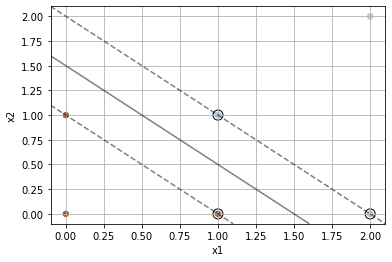

In [ ]:
#@title Plot the maximum margin hyperplane
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.datasets import make_blobs

X_train
y_train

#Create a svm Classifier
svm_classifier = svm.SVC(kernel='linear', C=1000) # Linear Kernel

#Train the model using the training sets
svm_classifier.fit(X_train, y_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.values, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Label axes
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()



<!DOCTYPE html>
<html>
<body>

<h2>Task 6: Consider a dataset with 3 points in 1-D:</h2>

Class | $x$
--- | ---
+ | 0
- | -1
- | +1


<h3>(a) Are the classes {+, −} linearly separable?</h3>

The scatterplot below shows the three training points. Because there does not exist at least one line in the plane with all of the blue points on one side of the line and all the red points on the other side, the classes {+, −} are not linearly separable.
</body>
</html>

In [ ]:
#@title Data

task6_data = pd.DataFrame({'x': [0, -1, 1], 'class': ['positive','negative','negative']})
task6_data

,x,class
0,0,positive
1,-1,negative
2,1,negative


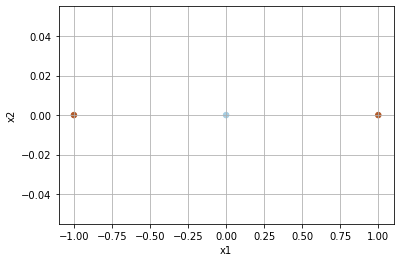

In [ ]:
#@title Plot data in 2D feature space
task6_data['x2'] = [0,0,0]
task6_data['class'] = [0,1,1]

plt.scatter(task6_data.x, task6_data['x2'], c=task6_data['class'], s=30, cmap=plt.cm.Paired)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

#plt.scatter(X_train.x, c=task5_data['class'], s=30, cmap=plt.cm.Paired)

<!DOCTYPE html>
<html>
<body>

<h3>(b) Consider mapping each point to 3-D using new feature vectors φ(x) = [1, sqrt(2)x, x^2 ] . Are the classes now linearly separable? If so, find a separating hyperplane.</h3>

The scatterplot below shows the three training points. Because there does not exist at least one line in the plane with all of the blue points on one side of the line and all the red points on the other side, the classes {+, −} are not linearly separable.
</body>
</html>

In [ ]:
#@title Mapping of data to 3D feature space
print('The input data map from [x1, x2] to [x1, x1 x2] coordinates as follows:\n')
task6_data = pd.DataFrame({'x': [0, -1, 1], 'class': ['positive','negative','negative']})
task6_data

arrow = pd.DataFrame({'': [' ', ' ', ' '],' ': [' ', ' ', '-'], '  ':[' ', ' ', '-'], '   ': [' ',' ','->']}, index = ['', ' ', '  '])

task6_data_with_mapping = pd.DataFrame({'x=1': [1, 1, 1], 'y=sqrt(x)':[0, -np.sqrt(2), np.sqrt(2)], 'z=x^2':[0, 1, 1], 'class': ['positive','negative','negative']})
task6_data_with_mapping['y=sqrt(x)'] = task6_data_with_mapping['y=sqrt(x)'].map('{:,.2f}'.format)


display_side_by_side([task6_data, arrow, task6_data_with_mapping], ['Input Data',' ','Mapped Data\n'])

The input data map from [x1, x2] to [x1, x1 x2] coordinates as follows:



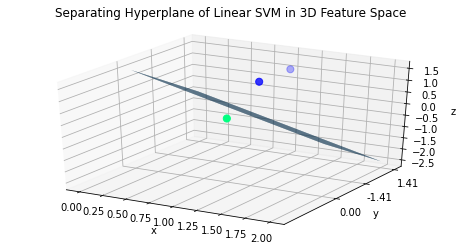

In [ ]:
#@title Plot separating hyperplane in 3D feature space

def get_svm_plane(X,labels):
    svc = SVC(kernel='linear')
    svc.fit(X,labels)
    z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]
    tmp = np.linspace(0, 60, 2)
    x, y = np.meshgrid(tmp, tmp)
    return x,y,z,svc.coef_[0],-svc.intercept_[0]


X = task6_data_with_mapping.iloc[:, :3]
Y = task6_data_with_mapping['class']
Y = task6_data_with_mapping['class'].map({'positive':1,'negative':0})

model = svm.SVC(kernel='linear')
c1clf = model.fit(X, Y)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 1, 1, projection='3d')

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][1]
tmp = np.linspace(0,2,30)
x,y = np.meshgrid(tmp,tmp)

plt.title('Separating Hyperplane of Linear SVM in 3D Feature Space\n')
ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=Y, s=50, cmap='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, z(x,y))
plt.show()

print("")

<!DOCTYPE html>
<html>
<body>

<h2>Task 7:Learning SVMs on the Titanic dataset. Please report your five-fold cross validation classification accuracies on Titanic training set, with respect to the linear, quadratic, and RBF kernels. Which kernel is the best in your case?</h2>

---- Average Scores for SVM Model Using linear Kernel ----
>Accuracy Score:  0.7910447761194029

>Precision Score:  0.7722772277227723

>Recall Score:  0.7027027027027027

>F1 Score:  0.7358490566037735

---- Average Scores for SVM Model Using rbf Kernel ----
>Accuracy Score:  0.6958955223880597

>Precision Score:  0.6861386138613861

>Recall Score:  0.40540540540540543

>F1 Score:  0.45952758173700137


</body>
</html>

In [ ]:
#@title Upload Titatic data sets
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
#@title Read train and test Titanic data sets
# read train datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [ ]:
#@title Clean and pre-process Titanic data set
#According to the pairplot, the Age and Cabin column have lots of missing values. 
#We get the median of data for the Age and Fare columns, so that we can 
# do exploratory analysis with the Age and Fare data.

# Fill missing values
train['Fare'] = train['Fare'].fillna(train['Fare'].dropna().median())
train['Age'] = train['Age'].fillna(train['Age'].dropna().median())

# We replace the missing values in the Embarked columnn with the label 'S'
train['Embarked']=train['Embarked'].fillna('S')

# To use the sex data, we change the type of the data from categorical to numerical
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1

# To use the Embarked data, we also change the type of the data from categorical to numerical
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2

# Continue to clean and pre-process data set
variable_name = "" #@param {type:"string"}
#The individual names, the cabin and the ticket are probably less informative
#columns for classifying whether or not the individual survived. 
# Thus, we drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket']
train = train.drop(drop_elements, axis=1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [ ]:
#@title Learn SVM model with respect to the linear, quadratic, and RBF kernels
from sklearn.model_selection import train_test_split

target = train['Survived'].values
data_features_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
features = train[data_features_names].values



In [ ]:
#@title Learn SVM model and report five-fold cross validation classification accuracies on Titanic training set
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import (cross_val_score, KFold, StratifiedKFold)

#Cross-validation 5-fold
folds = StratifiedKFold(n_splits = 5, shuffle = True)

# create a list of the types of kernels for analysis
types_of_kernels = ['linear', 'rbf', 'poly']

#Getting all the scores from the cross validation
accuracy_scores_SVM = []
precision_scores_SVM = []
recall_scores_SVM = []
f1_scores_SVM = []

#Fit SVM model to training set
for index, kernel in enumerate(types_of_kernels):
    for train_index, test_index in folds.split(features, target):
        print('train_index = {train_index}'.format(train_index = train_index))
        #Build test and training test
        X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
        SVM_classifier = svm.SVC(kernel=kernel, gamma=3)
        SVM_classifier.fit(X_train, y_train)
        print('finished training')
        predSVM = SVM_classifier.predict(X_test)
        print('finished predicting\n')
        accuracy_scores_SVM.append(accuracy_score(y_test, predSVM))
        precision_scores_SVM.append(precision_score(y_test, predSVM))
        recall_scores_SVM.append(recall_score(y_test, predSVM))
        f1_scores_SVM.append(f1_score(y_test, predSVM))

    #Print Average Scores for SVM
    print('---- {index} Average Scores for SVM Model Using {kernel} Kernel ----'.format(index=index, kernel=kernel))
    print('Accuracy Score: ', np.average(accuracy_scores_SVM))
    print('Precision Score: ', np.average(precision_scores_SVM))
    print('Recall Score: ', np.average(recall_scores_SVM))
    print('F1 Score: ', np.average(f1_scores_SVM))
    print()
    print()

train_index = [  0   2   3   4   5   6   7   8   9  10  11  12  13  16  18  20  21  22
  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40  41  42
  44  47  48  49  50  51  53  54  55  56  57  58  59  61  62  64  65  66
  67  68  69  70  71  72  74  75  76  77  78  80  81  82  84  85  86  87
  88  90  91  92  93  95  96  97  99 100 101 102 103 104 106 108 109 112
 113 114 115 116 117 118 119 120 121 124 125 126 128 129 130 131 132 133
 134 135 136 140 141 143 145 146 148 150 151 152 153 154 156 157 158 160
 161 162 163 166 168 169 170 171 172 173 174 175 176 178 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 198 200 202 203 205
 206 207 209 210 211 214 217 219 221 222 223 224 225 226 228 229 230 231
 234 235 236 237 238 239 240 241 242 244 246 249 251 252 254 255 256 257
 260 261 264 265 266 267 269 270 271 272 273 277 280 281 282 284 285 286
 287 289 290 292 293 294 295 297 298 299 300 302 303 304 305 306 307 308
 309 310 311 313 314 317 318 319 320 